In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from FileCounter import fileCount
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.functional as F
import numpy as np
import seaborn as sns

import cv2

In [2]:
mp = fileCount('data/Fold1/Fold1/Fold1/Train/Monkeypox')
no_mp = fileCount('data/Original Images/Original Images/Others')
print(f"Images per class \n Monkeypox: {mp} \n Other: {no_mp}")

Images per class 
 Monkeypox: 980 
 Other: 126


In [3]:
trainData = 'data/Fold1/Fold1/Fold1/Train'
valData = 'data/Fold1/Fold1/Fold1/Val'
testData = 'data/Fold1/Fold1/Fold1/Test'

In [4]:
transforms =  transforms.Compose([
    # transforms.Resize((100, 100)),
    transforms.ToTensor(),
    
])

train_dataset = datasets.ImageFolder(trainData, transform=transforms)
val_dataset = datasets.ImageFolder(valData, transform=transforms)
test_dataset = datasets.ImageFolder(testData, transform=transforms)

In [5]:
test_dataset[20]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.9373, 0.9412, 0.9490],
          [1.0000, 1.0000, 1.0000,  ..., 0.9529, 0.9686, 0.9804],
          [0.9922, 0.9961, 0.9922,  ..., 0.9686, 0.9922, 1.0000],
          ...,
          [0.3843, 0.3804, 0.3725,  ..., 0.4353, 0.4392, 0.4235],
          [0.3569, 0.3608, 0.3569,  ..., 0.4039, 0.4039, 0.3765],
          [0.3451, 0.3490, 0.3529,  ..., 0.3804, 0.3765, 0.3451]],
 
         [[0.7686, 0.7765, 0.7882,  ..., 0.5922, 0.5961, 0.6039],
          [0.7647, 0.7765, 0.7804,  ..., 0.6078, 0.6235, 0.6353],
          [0.7647, 0.7686, 0.7647,  ..., 0.6275, 0.6471, 0.6627],
          ...,
          [0.1255, 0.1216, 0.1137,  ..., 0.2157, 0.2196, 0.2039],
          [0.1098, 0.1098, 0.1059,  ..., 0.1922, 0.1961, 0.1686],
          [0.0941, 0.0980, 0.1020,  ..., 0.1686, 0.1686, 0.1373]],
 
         [[0.6863, 0.6941, 0.7020,  ..., 0.5529, 0.5569, 0.5647],
          [0.6824, 0.6902, 0.6941,  ..., 0.5686, 0.5843, 0.5961],
          [0.6863, 0.6902, 0.6863,  ...,

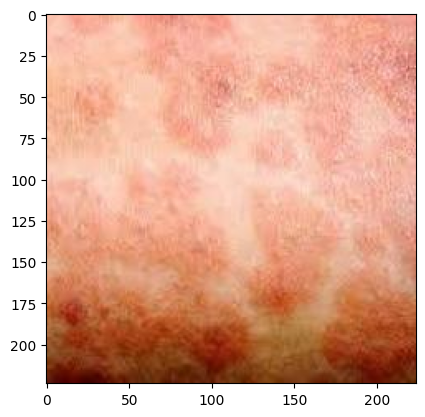

1


In [6]:
image, label = test_dataset[20]
plt.imshow(image.permute(1, 2, 0))
plt.show()
print(label)

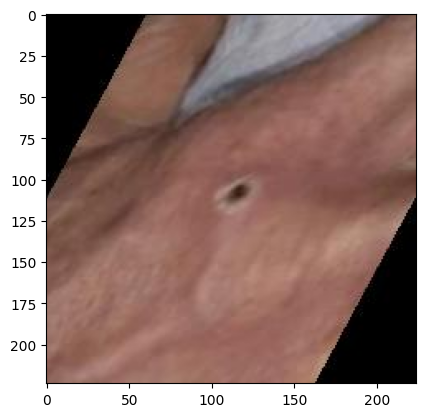

0


In [7]:
image, label = train_dataset[47]
plt.imshow(image.permute(1, 2, 0))
plt.show()
print(label)

In [8]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
valloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)


In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = self.pool3(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

[1,   200] loss: 0.201
[1,   400] loss: 0.202
Epoch [1] - Training Loss: 0.042, Training Accuracy: 92.16 %
Epoch [1] - Validation Loss: 0.122, Validation Accuracy: 95.80 %
[2,   200] loss: 0.161
[2,   400] loss: 0.177
Epoch [2] - Training Loss: 0.043, Training Accuracy: 93.09 %
Epoch [2] - Validation Loss: 0.099, Validation Accuracy: 96.92 %
[3,   200] loss: 0.112
[3,   400] loss: 0.125
Epoch [3] - Training Loss: 0.043, Training Accuracy: 94.63 %
Epoch [3] - Validation Loss: 0.093, Validation Accuracy: 97.67 %
[4,   200] loss: 0.122
[4,   400] loss: 0.112
Epoch [4] - Training Loss: 0.027, Training Accuracy: 95.38 %
Epoch [4] - Validation Loss: 0.081, Validation Accuracy: 97.20 %
[5,   200] loss: 0.112
[5,   400] loss: 0.069
Epoch [5] - Training Loss: 0.017, Training Accuracy: 96.87 %
Epoch [5] - Validation Loss: 0.048, Validation Accuracy: 98.88 %
[6,   200] loss: 0.091
[6,   400] loss: 0.078
Epoch [6] - Training Loss: 0.024, Training Accuracy: 96.50 %
Epoch [6] - Validation Loss: 0.03

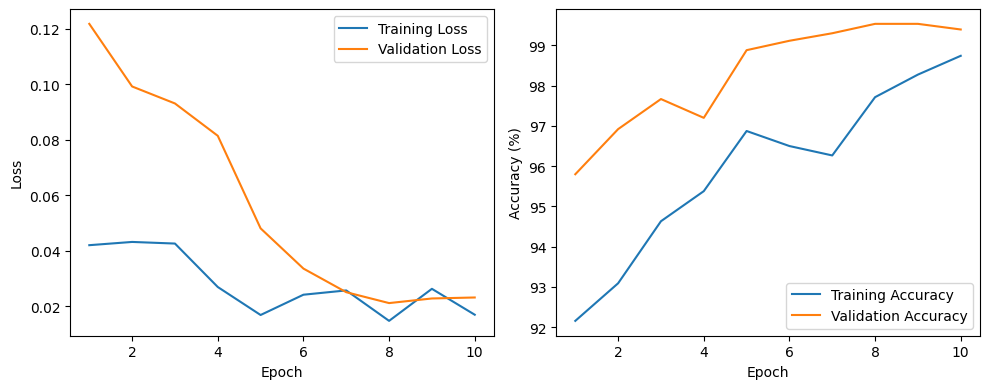

Finished Training


In [15]:
# Step 4: Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

net.train()

for epoch in range(10):
    # Training phase
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Training iteration
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move data to GPU

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        if i % 200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

    # Compute and store the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)

    print('Epoch [%d] - Training Loss: %.3f, Training Accuracy: %.2f %%' % (epoch + 1, epoch_loss, epoch_accuracy))

    # Validation phase
    net.eval()  # Switch to evaluation mode

    val_correct = 0
    val_total = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for val_data in valloader:
            val_inputs, val_labels = val_data
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            val_outputs = net(val_inputs)
            val_loss = criterion(val_outputs, val_labels)

            val_running_loss += val_loss.item()
            _, val_predicted = val_outputs.max(1)
            val_total += val_labels.size(0)
            val_correct += val_predicted.eq(val_labels).sum().item()

    # Compute and store the average validation loss and accuracy for the epoch
    val_epoch_loss = val_running_loss / len(valloader)
    val_epoch_accuracy = 100 * val_correct / val_total
    val_loss_history.append(val_epoch_loss)
    val_accuracy_history.append(val_epoch_accuracy)

    print('Epoch [%d] - Validation Loss: %.3f, Validation Accuracy: %.2f %%' % (
        epoch + 1, val_epoch_loss, val_epoch_accuracy))

    net.train()  # Switch back to training mode

# Plot the loss and accuracy curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy_history) + 1), train_accuracy_history, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_history) + 1), val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

print('Finished Training')


Accuracy of the network on the test images: 66 %
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.90      0.71        20
           1       0.86      0.48      0.62        25

    accuracy                           0.67        45
   macro avg       0.72      0.69      0.66        45
weighted avg       0.73      0.67      0.66        45



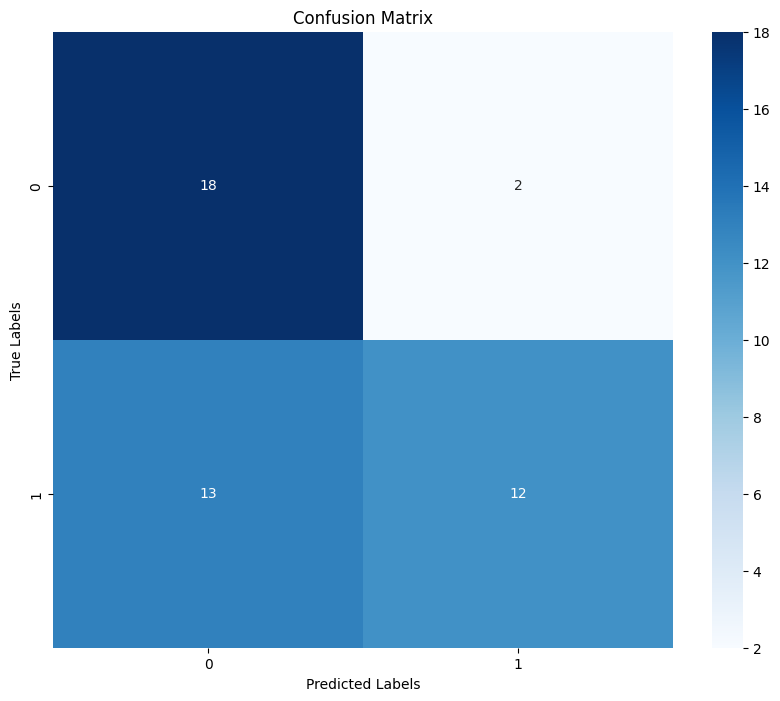

In [17]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

net.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # move data to GPU
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Calculate classification report
report = classification_report(true_labels, predicted_labels)

# Print the confusion matrix and classification report
# print('Confusion Matrix:')
# print(confusion_mat)
print('Classification Report:')
print(report)

# Visualize the confusion matrix
class_names = [str(i) for i in range(2)]  # Replace with your class names

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
